In [2]:
!unzip ezyzip.zip


Archive:  ezyzip.zip
   creating: brain_tumor_dataset/
   creating: brain_tumor_dataset/train/
   creating: brain_tumor_dataset/train/yes/
  inflating: brain_tumor_dataset/train/yes/Y1.jpg  
  inflating: brain_tumor_dataset/train/yes/Y10.jpg  
  inflating: brain_tumor_dataset/train/yes/Y11.jpg  
  inflating: brain_tumor_dataset/train/yes/Y12.jpg  
  inflating: brain_tumor_dataset/train/yes/Y13.jpg  
  inflating: brain_tumor_dataset/train/yes/Y14.jpg  
  inflating: brain_tumor_dataset/train/yes/Y15.jpg  
  inflating: brain_tumor_dataset/train/yes/Y16.JPG  
  inflating: brain_tumor_dataset/train/yes/Y17.jpg  
  inflating: brain_tumor_dataset/train/yes/Y18.JPG  
  inflating: brain_tumor_dataset/train/yes/Y19.JPG  
  inflating: brain_tumor_dataset/train/yes/Y2.jpg  
  inflating: brain_tumor_dataset/train/yes/Y20.jpg  
  inflating: brain_tumor_dataset/train/yes/Y21.jpg  
  inflating: brain_tumor_dataset/train/yes/Y22.jpg  
  inflating: brain_tumor_dataset/train/yes/Y23.JPG  
  inflating: br

58892288/58889256 [==============================] - 1s 0us/step
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
______________________________________________________________

/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/5
4/4 [==============================] - 124s 39s/step - loss: 1.9745 - accuracy: 0.5494 - val_loss: 2.7850 - val_accuracy: 0.5724
Epoch 2/5
4/4 [==============================] - 122s 35s/step - loss: 2.0149 - accuracy: 0.6900 - val_loss: 1.3574 - val_accuracy: 0.6000
Epoch 3/5
4/4 [==============================] - 122s 35s/step - loss: 1.1539 - accuracy: 0.6739 - val_loss: 1.0356 - val_accuracy: 0.5793
Epoch 4/5
4/4 [==============================] - 130s 37s/step - loss: 0.6620 - accuracy: 0.7339 - val_loss: 0.7323 - val_accuracy: 0.7310
Epoch 5/5
4/4 [==============================] - 123s 39s/step - loss: 0.5733 - accuracy: 0.8157 - val_loss: 0.7322 - val_accuracy: 0.7310


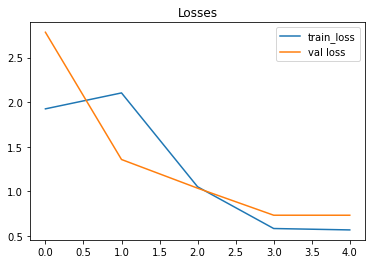

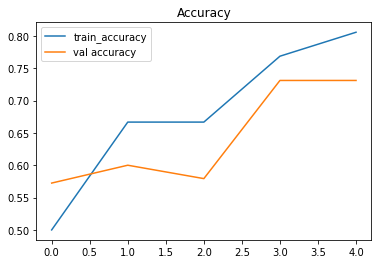

<Figure size 432x288 with 0 Axes>

In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Model
from keras.applications.vgg16 import VGG16
from glob import glob
img_size = [224,224]

train_dataset = 'brain_tumor_dataset/train'
test_dataset = 'brain_tumor_dataset/test'
vgg = VGG16(input_shape=img_size+[3], weights='imagenet', include_top=False)
for x in vgg.layers:
    x.trainable =False
    classes = glob('brain_tumor_dataset/train/*')
classes
x = tf.keras.layers.Flatten()(vgg.output)
cl = tf.keras.layers.Dense(len(classes), activation = 'softmax')(x)
model = Model(inputs = vgg.input, outputs = cl)
model.summary()
model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics=['accuracy'])
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

train_data = train_datagen.flow_from_directory('brain_tumor_dataset/train',
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')
test_data = test_datagen.flow_from_directory('brain_tumor_dataset/test',
                                               target_size = (224,224),
                                               batch_size = 32,
                                               class_mode = 'categorical')
J = model.fit_generator(train_data,
                        validation_data=test_data,
                        epochs=5,
                        steps_per_epoch = len(train_data),
                        validation_steps= len(test_data))
plt.plot(J.history['loss'], label = 'train_loss')
plt.plot(J.history['val_loss'], label = 'val loss')
plt.legend()
plt.title('Losses')
plt.show()
plt.savefig('Lossess VGG16 LungDisease')
plt.plot(J.history['accuracy'], label = 'train_accuracy')
plt.plot(J.history['val_accuracy'], label = 'val accuracy')
plt.legend()
plt.title('Accuracy')
plt.show()
plt.savefig('Accuracy VGG16 LungDisease')
model.save('model_vgg16_LD.h5')


In [20]:
import numpy as np
from keras.preprocessing import image
test = image.load_img('er.jpg', target_size=(224,224))
test = image.img_to_array(test)
test = np.expand_dims(test, axis=0)
result = model.predict(test)

In [21]:
result

array([[1.000000e+00, 6.971986e-34]], dtype=float32)